# **Bank's telemarketing analysis**

**Case Study Background**
Nowadays, marketing spending in the banking industry is massive, meaning that it is essential for banks to optimize marketing strategies and improve effectiveness. Understanding customers’ need leads to more effective marketing plans, smarter product designs and greater customer satisfaction.

**Main Objective** to increase the effectiveness of the bank's telemarketing campaign.

**Problem Statement**
This project will enable the bank to develop a more granular understanding of its customer base, predict customers' response to its telemarketing campaign and establish a target customer profile for future marketing plans.
By analyzing customer features, such as demographics and transaction history, the bank will be able to predict customer saving behaviours and identify which type of customers is more likely to make term deposits. The bank can then focus its marketing efforts on those customers. This will not only allow the bank to secure deposits more effectively but also increase customer satisfaction by reducing undesirable advertisements for certain customers.

This is a classification problem where the objective is to analyse and identify which type of customers is more likely to make term deposits.




Loading Packages

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from numpy import mean

Reading data

In [0]:
data=pd.read_csv('bank-full.csv')

Understanding the data

In [3]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [5]:
data.shape

(45211, 17)

We have 45211 rows and 17 columns. 

---


Column 'y' is the output variable here, all the other 16 variables are the inputs.


Data Cleansing

In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There is no missing value foud in the data.

Statistical Overview

---
The 5 point summary of the dataset.
Five-number summary is used to describe the distribution of data. Pandas makes it easy to find the five-number summary
1. Mean 
2. 1st Quartile (The 25th percentile)
3. 3rd Quartile: The *75h* percentile
4. Minimum: Smallest observation in the sample
5. Maximum: Largest observation in the sample

In [7]:
data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [8]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Lets now see how the data is distributed.

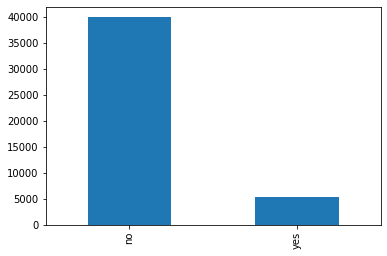

In [9]:
data['y'].value_counts().plot(kind='bar')

Looks our data is unbalanced

In [10]:
data.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c45c37828>,
      dtype=object)

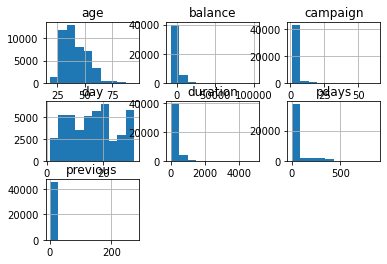

In [11]:
data.hist()

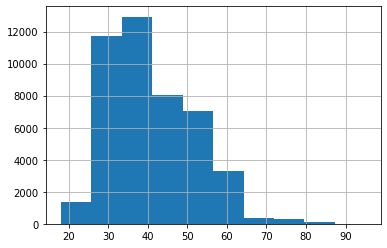

In [12]:
data['age'].hist()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


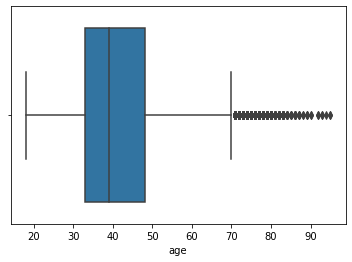

In [13]:
import seaborn as sns
sns.boxplot(data['age'])

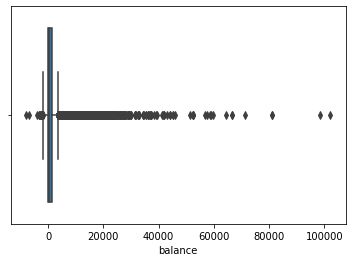

In [14]:
sns.boxplot(data['balance'])

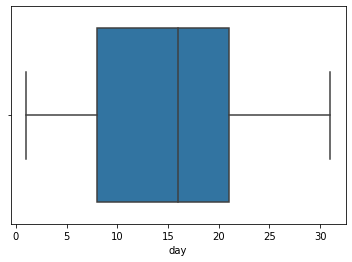

In [15]:
sns.boxplot(data['day'])

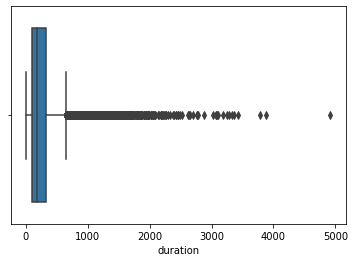

In [16]:
sns.boxplot(data['duration'])

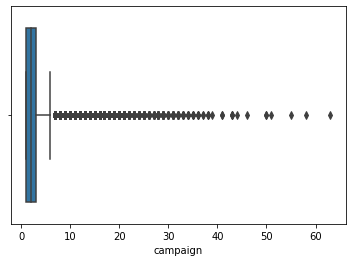

In [17]:
sns.boxplot(data['campaign'])

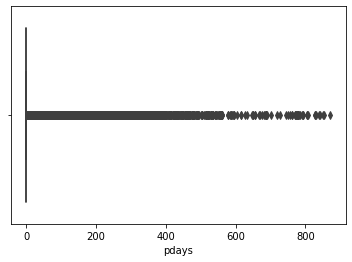

In [18]:
sns.boxplot(data['pdays'])

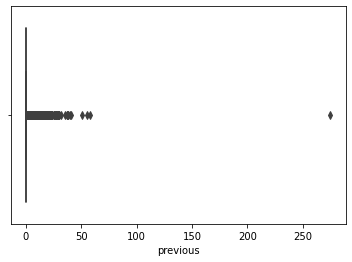

In [19]:
sns.boxplot(data['previous'])

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000


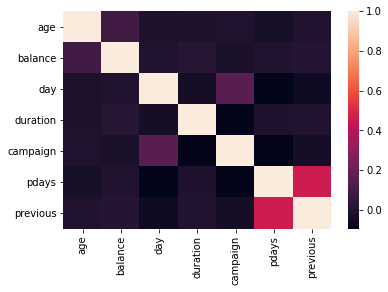

In [20]:
import seaborn as sns 
corr = data.corr()
sns.heatmap(corr)
print(corr)

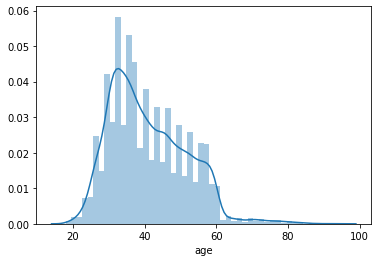

In [21]:
sns.distplot(data['age'])

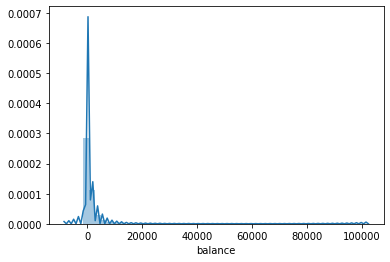

In [22]:
sns.distplot(data['balance'])

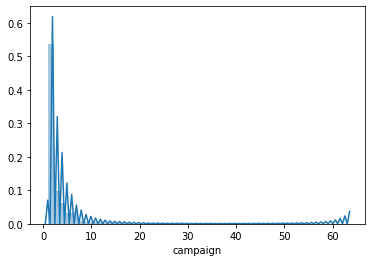

In [23]:
sns.distplot(data['campaign'])

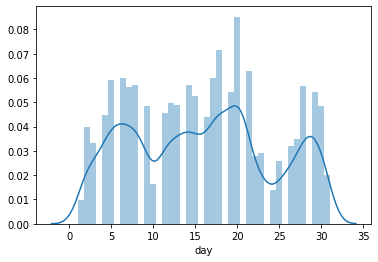

In [24]:
sns.distplot(data['day'])

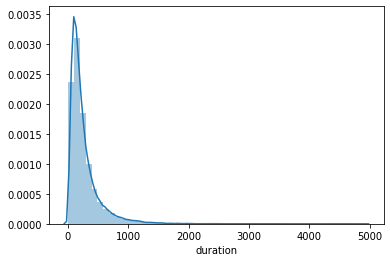

In [25]:
sns.distplot(data['duration'])

In [26]:
print(corr)

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000


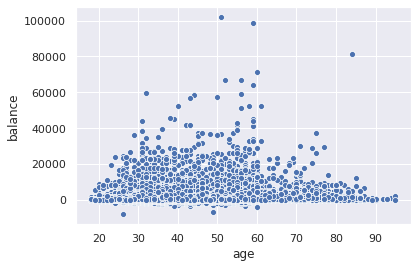

In [27]:
import seaborn as sns; 
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
ax = sns.scatterplot(x='age',y='balance', data=data)

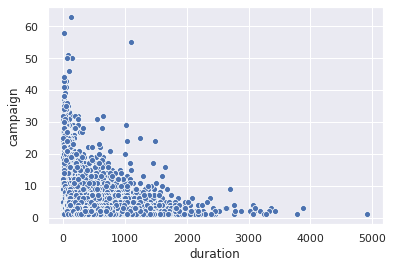

In [28]:
ax = sns.scatterplot(x='duration',y='campaign', data=data)

Categorical variable analysis

In [29]:
from scipy import stats
crosstab = pd.crosstab(data['y'], data['duration'])
stats.chi2_contingency(crosstab)

(10568.236244749178,
 0.0,
 1572,
 array([[2.64904559, 1.76603039, 2.64904559, ..., 0.8830152 , 0.8830152 ,
         0.8830152 ],
        [0.35095441, 0.23396961, 0.35095441, ..., 0.1169848 , 0.1169848 ,
         0.1169848 ]]))

In [30]:
crosstab1 = pd.crosstab(data['y'], data['marital'])
stats.chi2_contingency(crosstab1)

(196.4959456560396,
 2.1450999986791486e-43,
 2,
 array([[ 4597.86012254, 24030.37552808, 11293.76434938],
        [  609.13987746,  3183.62447192,  1496.23565062]]))

Feature Engineering

In [31]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [32]:
cat_attr = list(data.select_dtypes("object").columns)
num_attr = list(data.select_dtypes("int64").columns)
print("categorical variables are",cat_attr,'\n')
print("numerical ariables are",num_attr)

categorical variables are ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y'] 

numerical ariables are ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [0]:
for col in cat_attr:
    data[col] = data[col].astype('category')

In [34]:
cat_attr.pop(9)

'y'

# Import packages

In [0]:
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

Standardising numerical features

In [0]:
scaler = StandardScaler()
data_num = pd.DataFrame(scaler.fit_transform(data[num_attr]))

Standardising categorical features- Dummification

In [0]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
#data_cat = data[cat_attr]
#data_cat = le.fit_transform(data_cat)
data_cat = data[cat_attr].apply(le.fit_transform)

In [0]:
data1 = pd.concat([data_num,data_cat],axis = 1)

In [39]:
data1.describe

<bound method NDFrame.describe of               0         1         2         3  ...  loan  contact  month  poutcome
0      1.606965  0.256419 -1.298476  0.011016  ...     0        2      8         3
1      0.288529 -0.437895 -1.298476 -0.416127  ...     0        2      8         3
2     -0.747384 -0.446762 -1.298476 -0.707361  ...     1        2      8         3
3      0.571051  0.047205 -1.298476 -0.645231  ...     0        2      8         3
4     -0.747384 -0.447091 -1.298476 -0.233620  ...     0        2      8         3
...         ...       ...       ...       ...  ...   ...      ...    ...       ...
45206  0.947747 -0.176460  0.143418  2.791329  ...     0        0      9         3
45207  2.831227  0.120447  0.143418  0.768224  ...     0        0      9         3
45208  2.925401  1.429593  0.143418  3.373797  ...     0        0      9         2
45209  1.512791 -0.228024  0.143418  0.970146  ...     0        1      9         3
45210 -0.370689  0.528364  0.143418  0.399328  ...   

Train/Test Split

In [0]:
y=data['y']
x=data1

In [0]:
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.20,random_state=123)

In [42]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(36168, 16)
(36168,)
(9043, 16)
(9043,)


Logistic Regression

In [43]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import  metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RepeatedStratifiedKFold


clf_logreg =  LogisticRegression()
clf_logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
train_pred_log = clf_logreg.predict(X_train)
test_pred_log= clf_logreg.predict(X_test)
confusion_matrix_train = confusion_matrix(y_true = y_train, y_pred = train_pred_log)
print(confusion_matrix_train)
confusion_matrix_test = confusion_matrix(y_true = y_test, y_pred = test_pred_log)
print(confusion_matrix_test)
print("classification_report",classification_report(y_train,train_pred_log,digits=4))
print("classification_report",classification_report(y_test,test_pred_log,digits=4))


[[31319   617]
 [ 3315   917]]
[[7832  154]
 [ 835  222]]
classification_report               precision    recall  f1-score   support

          no     0.9043    0.9807    0.9409     31936
         yes     0.5978    0.2167    0.3181      4232

    accuracy                         0.8913     36168
   macro avg     0.7510    0.5987    0.6295     36168
weighted avg     0.8684    0.8913    0.8681     36168

classification_report               precision    recall  f1-score   support

          no     0.9037    0.9807    0.9406      7986
         yes     0.5904    0.2100    0.3098      1057

    accuracy                         0.8906      9043
   macro avg     0.7470    0.5954    0.6252      9043
weighted avg     0.8670    0.8906    0.8669      9043



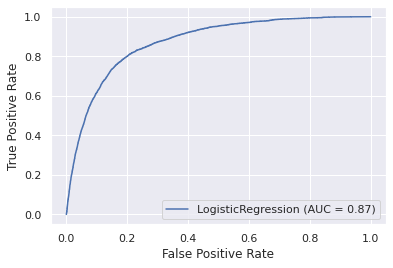

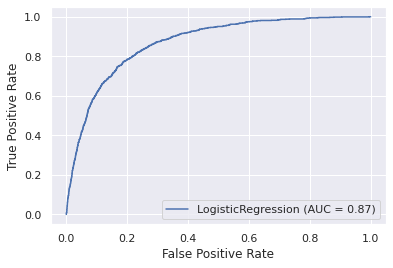

In [45]:
metrics.plot_roc_curve(clf_logreg, X_train, y_train)
metrics.plot_roc_curve(clf_logreg, X_test, y_test)

MLP 

In [46]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(10,10,10 ), verbose = True, solver = 'adam', max_iter=300)
MLP.fit(X_train, y_train)


Iteration 1, loss = 0.52001830
Iteration 2, loss = 0.33195034
Iteration 3, loss = 0.27933440
Iteration 4, loss = 0.25893323
Iteration 5, loss = 0.25469004
Iteration 6, loss = 0.25335989
Iteration 7, loss = 0.25245971
Iteration 8, loss = 0.25171892
Iteration 9, loss = 0.25058319
Iteration 10, loss = 0.24983573
Iteration 11, loss = 0.24899376
Iteration 12, loss = 0.24815224
Iteration 13, loss = 0.24681735
Iteration 14, loss = 0.24557380
Iteration 15, loss = 0.24358114
Iteration 16, loss = 0.24208331
Iteration 17, loss = 0.24002142
Iteration 18, loss = 0.23877608
Iteration 19, loss = 0.23738830
Iteration 20, loss = 0.23656450
Iteration 21, loss = 0.23571396
Iteration 22, loss = 0.23482684
Iteration 23, loss = 0.23403839
Iteration 24, loss = 0.23336689
Iteration 25, loss = 0.23313024
Iteration 26, loss = 0.23249566
Iteration 27, loss = 0.23202999
Iteration 28, loss = 0.23194404
Iteration 29, loss = 0.23210338
Iteration 30, loss = 0.23127368
Iteration 31, loss = 0.23105214
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [47]:
preds_mlp = MLP.predict(X_train)
cm_mlp = confusion_matrix(y_train, preds_mlp)
print(cm_mlp)
preds_mlp_test = MLP.predict(X_test)
cm_mlp_test = confusion_matrix(y_test, preds_mlp_test)
print(cm_mlp_test)
print('Accuracy Score :' ,accuracy_score(y_train, preds_mlp))
print('Accuracy Score :' ,accuracy_score(y_test, preds_mlp_test))
print("classification_report",classification_report(y_train,preds_mlp))
print("classification_report",classification_report(y_test,preds_mlp_test))


[[30903  1033]
 [ 2419  1813]]
[[7715  271]
 [ 618  439]]
Accuracy Score : 0.9045565140455651
Accuracy Score : 0.9016919163994249
classification_report               precision    recall  f1-score   support

          no       0.93      0.97      0.95     31936
         yes       0.64      0.43      0.51      4232

    accuracy                           0.90     36168
   macro avg       0.78      0.70      0.73     36168
weighted avg       0.89      0.90      0.90     36168

classification_report               precision    recall  f1-score   support

          no       0.93      0.97      0.95      7986
         yes       0.62      0.42      0.50      1057

    accuracy                           0.90      9043
   macro avg       0.77      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043



KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(algorithm = 'brute',n_neighbors=5,metric="euclidean")
clf_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [50]:
train_pred_log = clf_knn.predict(X_train)
test_pred_log= clf_knn.predict(X_test)
confusion_matrix_train = confusion_matrix(y_true = y_train, y_pred = train_pred_log)
print(confusion_matrix_train)
confusion_matrix_test = confusion_matrix(y_true = y_test, y_pred = test_pred_log)
print(confusion_matrix_test)
print("classification_report",classification_report(y_train,train_pred_log,digits=4))
print("classification_report",classification_report(y_test,test_pred_log,digits=4))

[[31287   649]
 [ 2171  2061]]
[[7735  251]
 [ 707  350]]
classification_report               precision    recall  f1-score   support

          no     0.9351    0.9797    0.9569     31936
         yes     0.7605    0.4870    0.5938      4232

    accuracy                         0.9220     36168
   macro avg     0.8478    0.7333    0.7753     36168
weighted avg     0.9147    0.9220    0.9144     36168

classification_report               precision    recall  f1-score   support

          no     0.9163    0.9686    0.9417      7986
         yes     0.5824    0.3311    0.4222      1057

    accuracy                         0.8941      9043
   macro avg     0.7493    0.6498    0.6819      9043
weighted avg     0.8772    0.8941    0.8810      9043



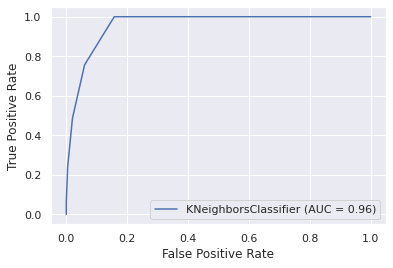

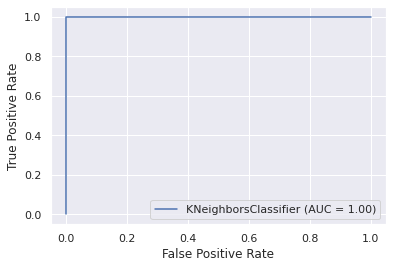

In [51]:
metrics.plot_roc_curve(clf_knn, X_train, y_train)
metrics.plot_roc_curve(clf_knn, X_test, test_pred_log)

Decision Tree

In [0]:
from sklearn import tree
clf_dt = tree.DecisionTreeClassifier(class_weight = 'balanced')
clf_dt = clf_dt.fit(X_train, y_train)

In [53]:
train_pred_log = clf_dt.predict(X_train)
test_pred_log= clf_dt.predict(X_test)
confusion_matrix_train = confusion_matrix(y_true = y_train, y_pred = train_pred_log)
print(confusion_matrix_train)
confusion_matrix_test = confusion_matrix(y_true = y_test, y_pred = test_pred_log)
print(confusion_matrix_test)
print("classification_report",classification_report(y_train,train_pred_log))
print("classification_report",classification_report(y_test,test_pred_log))


[[31936     0]
 [    0  4232]]
[[7469  517]
 [ 615  442]]
classification_report               precision    recall  f1-score   support

          no       1.00      1.00      1.00     31936
         yes       1.00      1.00      1.00      4232

    accuracy                           1.00     36168
   macro avg       1.00      1.00      1.00     36168
weighted avg       1.00      1.00      1.00     36168

classification_report               precision    recall  f1-score   support

          no       0.92      0.94      0.93      7986
         yes       0.46      0.42      0.44      1057

    accuracy                           0.87      9043
   macro avg       0.69      0.68      0.68      9043
weighted avg       0.87      0.87      0.87      9043



Seems to be over-fitting

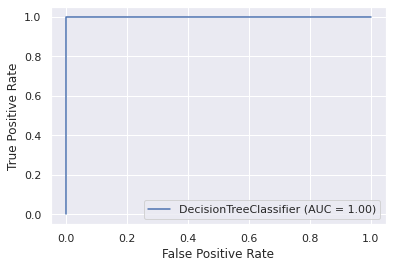

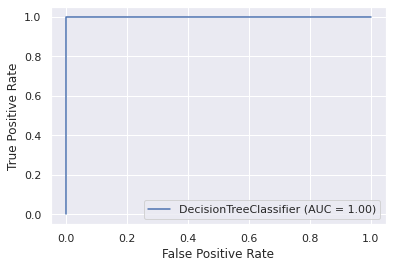

In [54]:
metrics.plot_roc_curve(clf_dt, X_train, y_train)
metrics.plot_roc_curve(clf_dt, X_test, test_pred_log)

Random Forest

In [55]:
# bootstrap class balanced random forest for imbalanced classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

model = RandomForestClassifier(n_estimators=10, class_weight='balanced_subsample')
model.fit(X_train, y_train)
train_pred_log = model.predict(X_train)
test_pred_log= model.predict(X_test)
confusion_matrix_train = confusion_matrix(y_true = y_train, y_pred = train_pred_log)
print(confusion_matrix_train)
confusion_matrix_test = confusion_matrix(y_true = y_test, y_pred = test_pred_log)
print(confusion_matrix_test)
print("classification_report",classification_report(y_train,train_pred_log))
print("classification_report",classification_report(y_test,test_pred_log))
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

[[31922    14]
 [  306  3926]]
[[7789  197]
 [ 742  315]]
classification_report               precision    recall  f1-score   support

          no       0.99      1.00      1.00     31936
         yes       1.00      0.93      0.96      4232

    accuracy                           0.99     36168
   macro avg       0.99      0.96      0.98     36168
weighted avg       0.99      0.99      0.99     36168

classification_report               precision    recall  f1-score   support

          no       0.91      0.98      0.94      7986
         yes       0.62      0.30      0.40      1057

    accuracy                           0.90      9043
   macro avg       0.76      0.64      0.67      9043
weighted avg       0.88      0.90      0.88      9043

Mean ROC AUC: 0.871


Over-fitting

Gradient Boosting

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=1, random_state=0).fit(X_train, y_train)
clf.fit(X_train, y_train).score(X_test, y_test)

0.9032400751962845

In [57]:
train_pred_log = clf.predict(X_train)
test_pred_log= clf.predict(X_test)
confusion_matrix_train = confusion_matrix(y_true = y_train, y_pred = train_pred_log)
print(confusion_matrix_train)
confusion_matrix_test = confusion_matrix(y_true = y_test, y_pred = test_pred_log)
print(confusion_matrix_test)
print("classification_report",classification_report(y_train,train_pred_log))
print("classification_report",classification_report(y_test,test_pred_log))
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

[[31039   897]
 [ 2614  1618]]
[[7784  202]
 [ 673  384]]
classification_report               precision    recall  f1-score   support

          no       0.92      0.97      0.95     31936
         yes       0.64      0.38      0.48      4232

    accuracy                           0.90     36168
   macro avg       0.78      0.68      0.71     36168
weighted avg       0.89      0.90      0.89     36168

classification_report               precision    recall  f1-score   support

          no       0.92      0.97      0.95      7986
         yes       0.66      0.36      0.47      1057

    accuracy                           0.90      9043
   macro avg       0.79      0.67      0.71      9043
weighted avg       0.89      0.90      0.89      9043

Mean ROC AUC: 0.870


F1-score is a better metric when there are imbalanced classes as in the above case. Classification models like logistic, KNN, Decision Tree, Random Forest, Gradient Boosting and MLP models are built.
Beforehand, Categorical Variables were dummified using label Encoder and Numerical variables are standardised by using Scaler transformation. And then the models are run over the data.